<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/seaborn_barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###[barplot](https://ko.wikipedia.org/wiki/%EB%A7%89%EB%8C%80_%EA%B7%B8%EB%9E%98%ED%94%84)-위키백과
- 포인트 추정치 및 신뢰구간을 직사각형 막대로 표시



###barplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)


####tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# 그래프확인

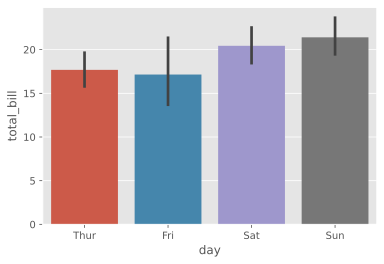

In [7]:
# x축 : day(category) , y축 : total_bill(float)
sns.barplot(x='day', y='total_bill', data=tips)

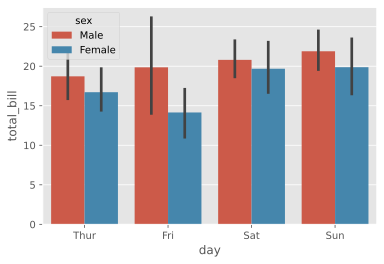

In [8]:
# hue 옵션 사용 
sns.barplot(x='day', y='total_bill', data=tips, hue='sex')

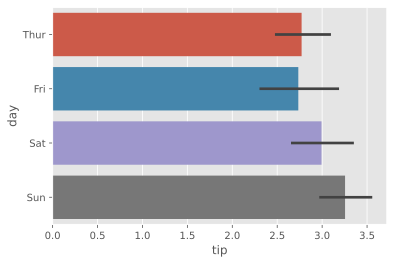

In [11]:
# 위의 그래프와 반대로 x축 :tip(float), y축 : day(category)
sns.barplot(x='tip', y='day', data=tips)

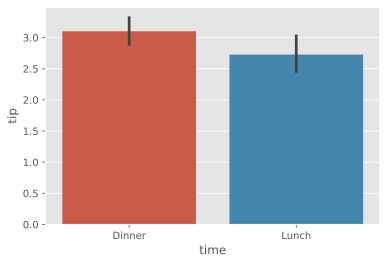

In [14]:
# order 옵션 사용
sns.barplot(x='time', y='tip', data=tips, order = ["Dinner", "Lunch"])

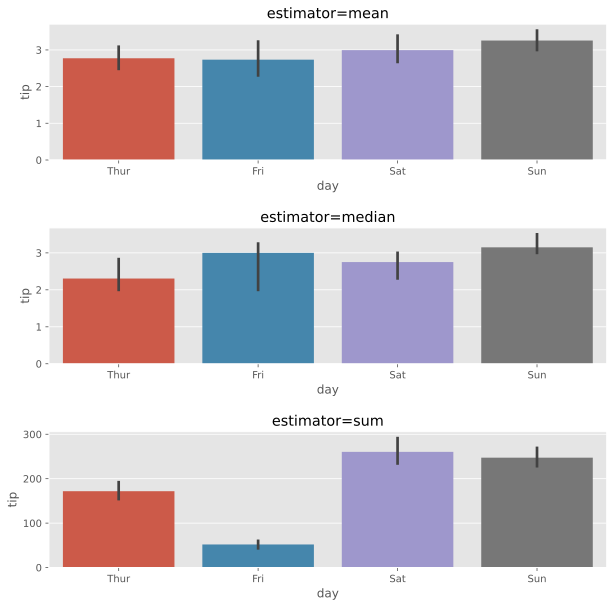

In [22]:
# estimator 옵션 사용

f, ax = plt.subplots(3,1,figsize=(10,10))

from numpy import mean, median, sum
sns.barplot(x='day', y='tip', data=tips, estimator=mean, ax=ax[0])
ax[0].set_title('estimator=mean')
sns.barplot(x='day', y='tip', data=tips, estimator=median, ax=ax[1])
ax[1].set_title('estimator=median')
sns.barplot(x='day', y='tip', data=tips, estimator=sum, ax=ax[2])
ax[2].set_title('estimator=sum')

plt.subplots_adjust(hspace=0.5)

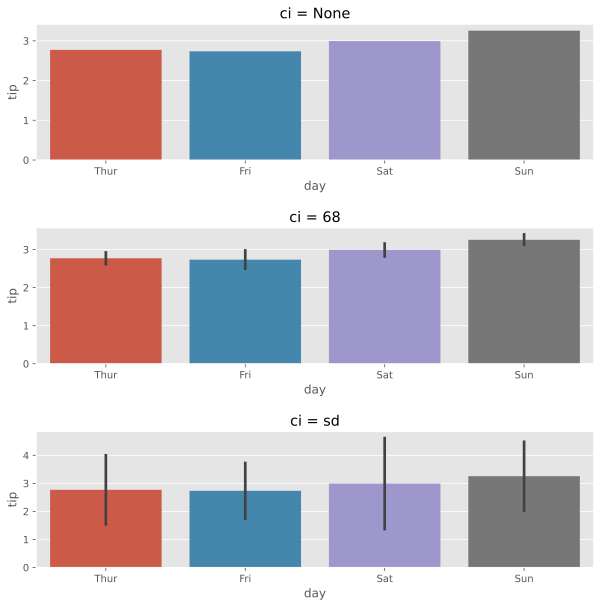

In [24]:
# ci 옵션 사용
f, ax = plt.subplots(3,1,figsize=(10,10))
#ci = None
sns.barplot(x='day', y='tip', data=tips, ax=ax[0], ci=None)
ax[0].set_title('ci = None')
#ci = 68
sns.barplot(x='day', y='tip', data=tips, ax=ax[1], ci=68)
ax[1].set_title("ci = 68")
#ci = 95
sns.barplot(x='day', y='tip', data=tips, ax=ax[2], ci='sd')
ax[2].set_title("ci = sd")

plt.subplots_adjust(hspace=0.5)

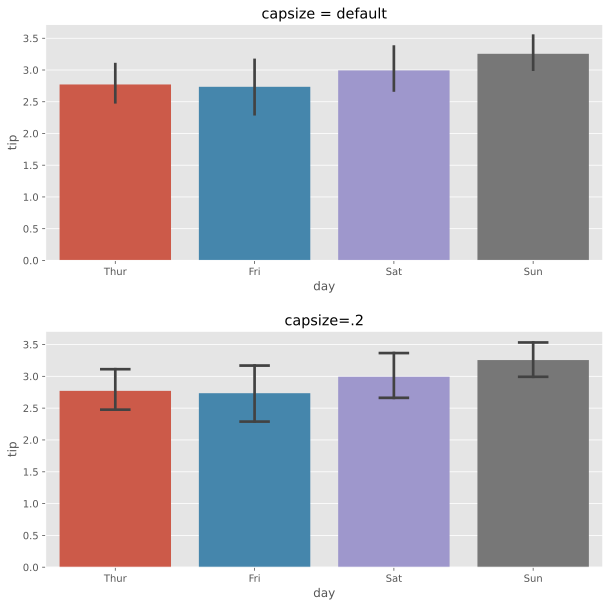

In [31]:
#capsize 옵션 사용

f, ax = plt.subplots(2,1,figsize=(10,10))

sns.barplot(x='day', y='tip', data=tips, capsize=0, ax=ax[0])
ax[0].set_title("capsize = default")

sns.barplot(x='day', y='tip', data=tips, capsize=.2, ax=ax[1])
ax[1].set_title("capsize=.2")

plt.subplots_adjust(hspace=.3)

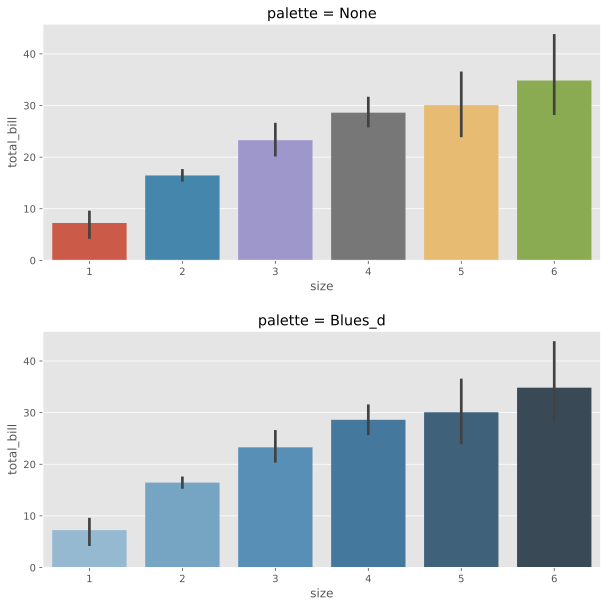

In [39]:
#palette 옵션 사용

f, ax = plt.subplots(2,1,figsize=(10,10))

sns.barplot(x='size', y='total_bill', data=tips,ax=ax[0],  palette=None)
ax[0].set_title('palette = None')

sns.barplot(x='size', y='total_bill', data=tips, ax=ax[1], palette='Blues_d')
ax[1].set_title('palette = Blues_d')

plt.subplots_adjust(hspace=0.3)

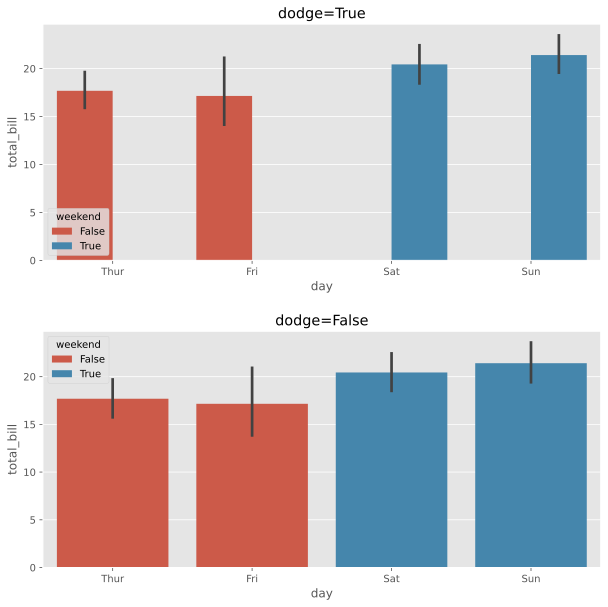

In [46]:
#dodge 옵션 사용

tips['weekend'] = tips['day'].isin(['Sat', "Sun"])

f, ax = plt.subplots(2,1,figsize=(10,10))
sns.barplot(x='day', y='total_bill', hue='weekend', data=tips, dodge=True, ax=ax[0])
ax[0].set_title('dodge=True')
sns.barplot(x='day', y='total_bill', hue='weekend', data=tips, dodge=False, ax=ax[1])
ax[1].set_title('dodge=False')

plt.subplots_adjust(hspace=0.3)

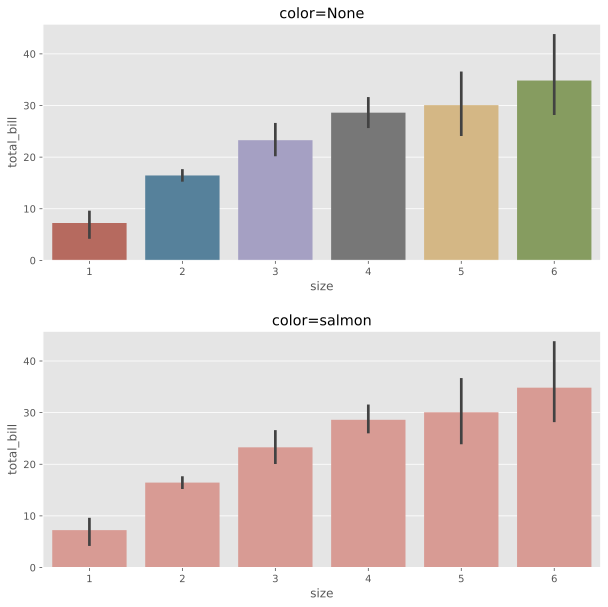

In [61]:
#단일 색상으로 막대 그래프 표현

f, ax = plt.subplots(2,1,figsize=(10,10))

sns.barplot(x='size', y='total_bill', data=tips, ax=ax[0], saturation=.5)
ax[0].set_title('color=None')
sns.barplot(x='size', y='total_bill', data=tips, ax=ax[1], color='salmon', saturation=.5)
ax[1].set_title('color=salmon')

plt.subplots_adjust(hspace=.3)

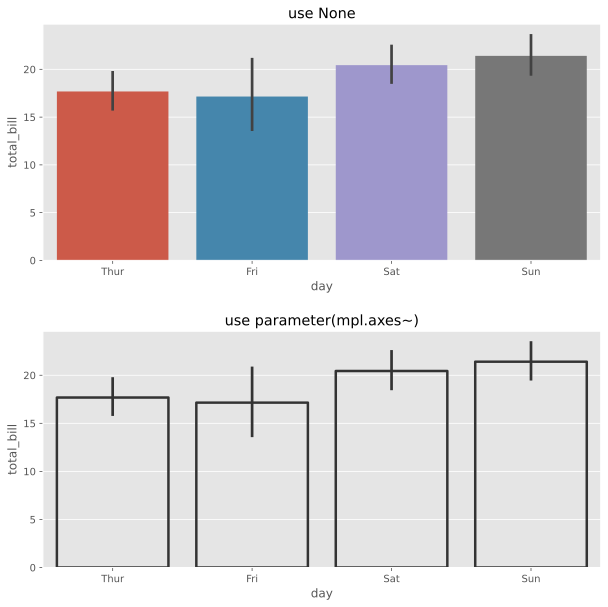

In [68]:
#maplotlib.axes.Axes.bar() 매개변수를 사용하여 스타일을 제어

f, ax = plt.subplots(2,1,figsize=(10,10))

sns.barplot(x='day', y='total_bill', data=tips, linewidth=2.5, ax=ax[0])
ax[0].set_title('use None')

sns.barplot(x='day', y='total_bill', data=tips, linewidth=2.5, ax=ax[1],
            facecolor=(1,1,1,0), errcolor=".2", edgecolor=".2")
ax[1].set_title("use parameter(mpl.axes~)")

plt.subplots_adjust(hspace=.3)

Text(0.5, 1.0, 'time = Dinner')

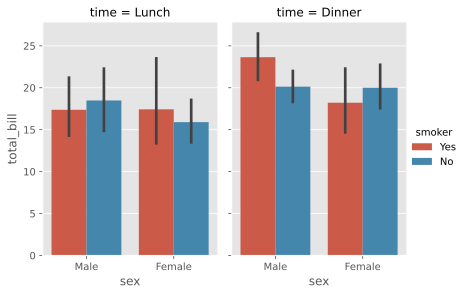

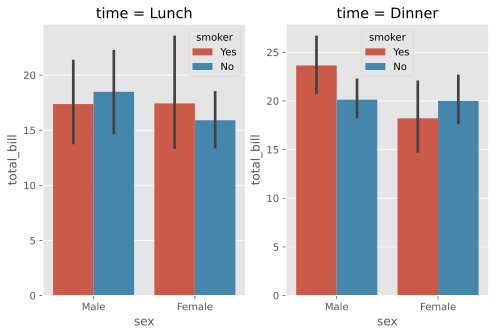

In [82]:
#catplot을 사용하여 barplot표현

sns.catplot(x='sex', y='total_bill', hue='smoker',col='time',
            data=tips, kind='bar', height=4, aspect=.7)

# plt.subplots을 사용하여 표현
f, ax=plt.subplots(1,2, figsize=(8, 5))

sns.barplot(x='sex', y='total_bill', hue='smoker', data=tips[tips["time"] =="Lunch"], ax=ax[0])
ax[0].set_title("time = Lunch")
ax[0]
sns.barplot(x='sex', y='total_bill', hue='smoker', data=tips[tips['time'] == "Dinner"], ax=ax[1])
ax[1].set_title("time = Dinner")